# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [5]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

Don't recognize host: host_os_name=Linux, am_host_os_name=Linux


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-ba143f5f-d587-4bf8-ae91-77aa45f0ea55.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask492_expose_gallery_notebook_config'
  hash='a364e2a27'
  # Last commits:
    * a364e2a27 dchoi127 Adding Debugging Notebooks                                        (    2 days ago) Mon Aug 7 17:46:46 2023  (HEAD -> SorrTask492_expose_gallery_notebook_config, origin/SorrTask492_expose_gallery_notebook_config)
    * bebc7257c dchoi127 LINTER!!!!                                                        (    2 days ago) Mo

# Build config

In [4]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [5]:
test_srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7

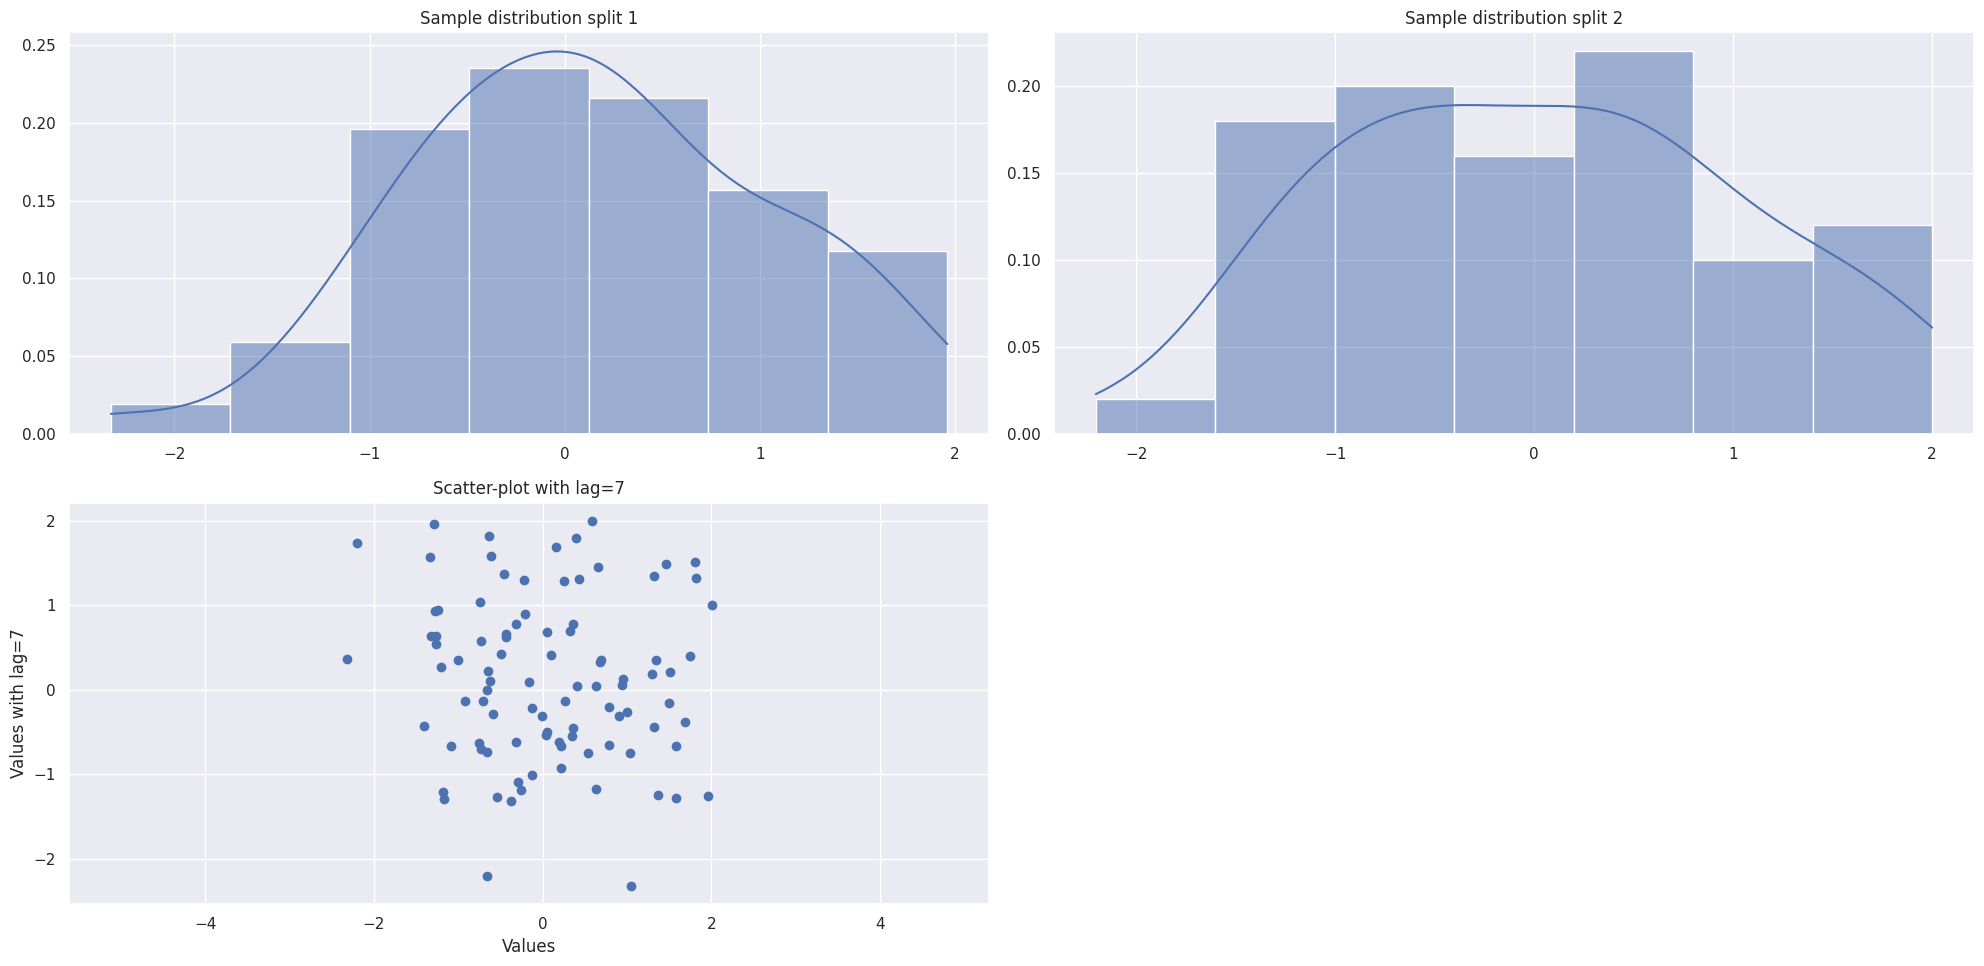

In [6]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

In [7]:
test_srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()

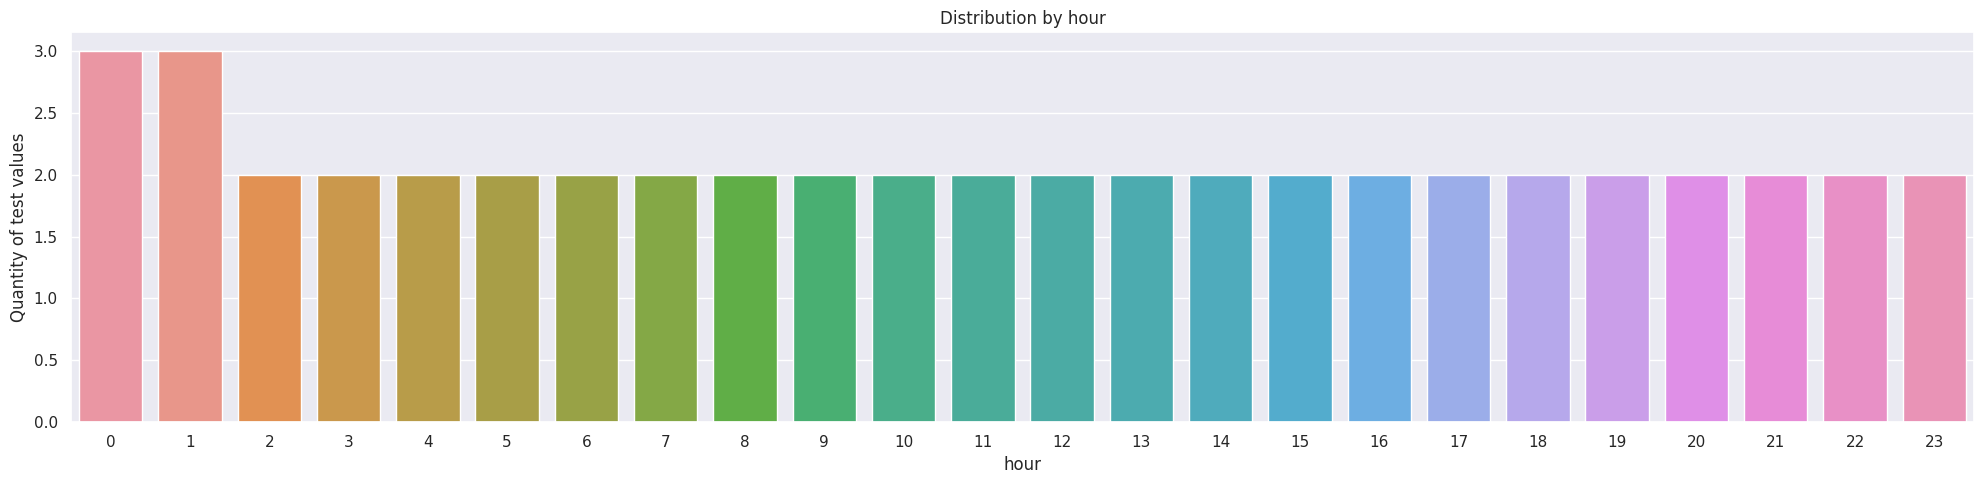

In [8]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

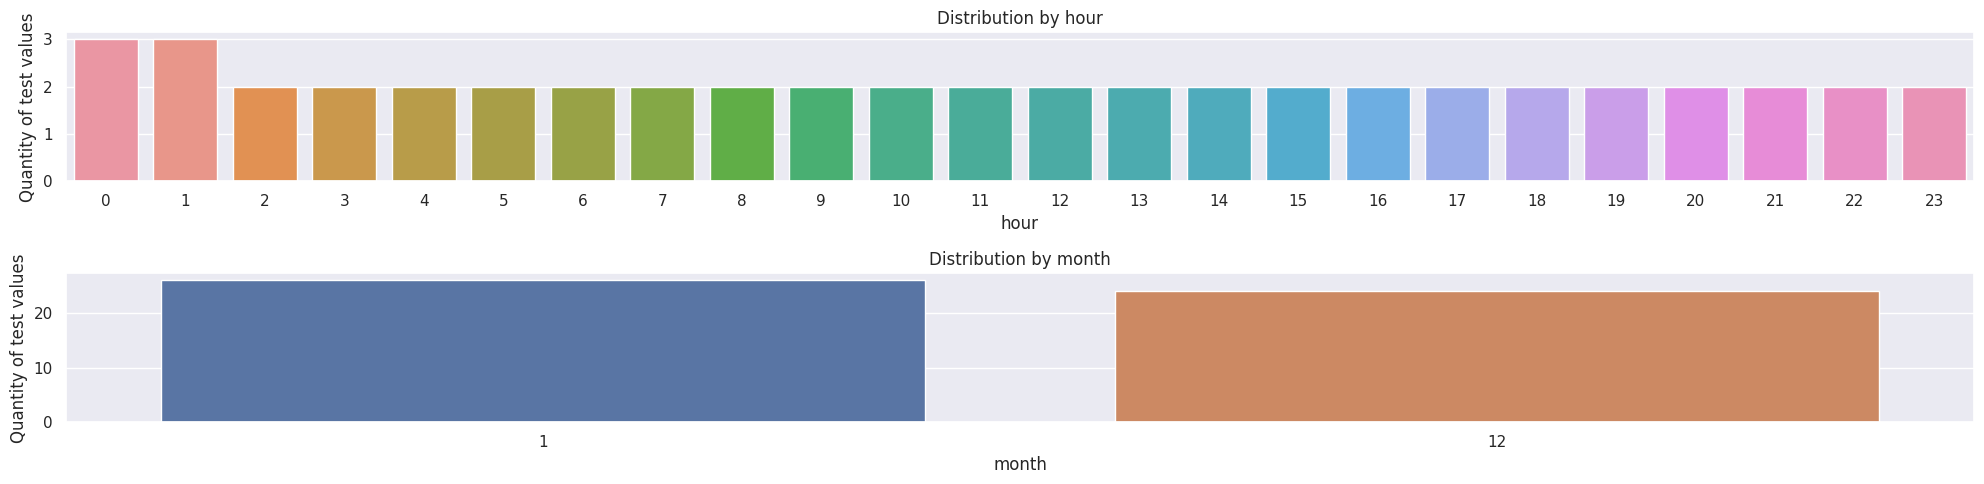

In [9]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

In [10]:
test_srs = cptetepl.Test_plots.get_plot_time_series_by_period1()

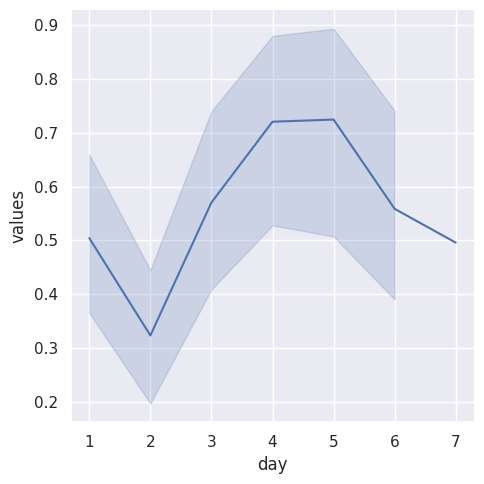

In [11]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

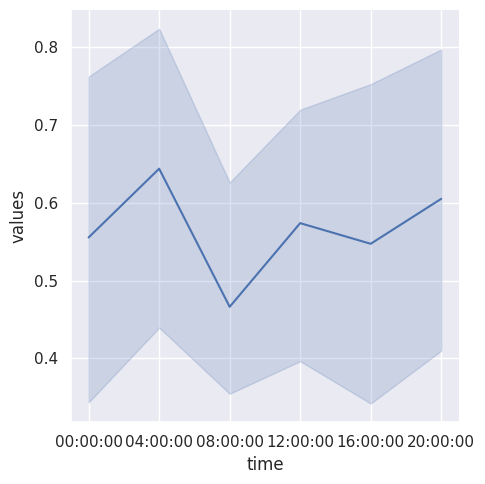

In [12]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [13]:
mode = "clustermap"
test_df = cptetepl.Test_plots.get_plot_heatmap1()

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


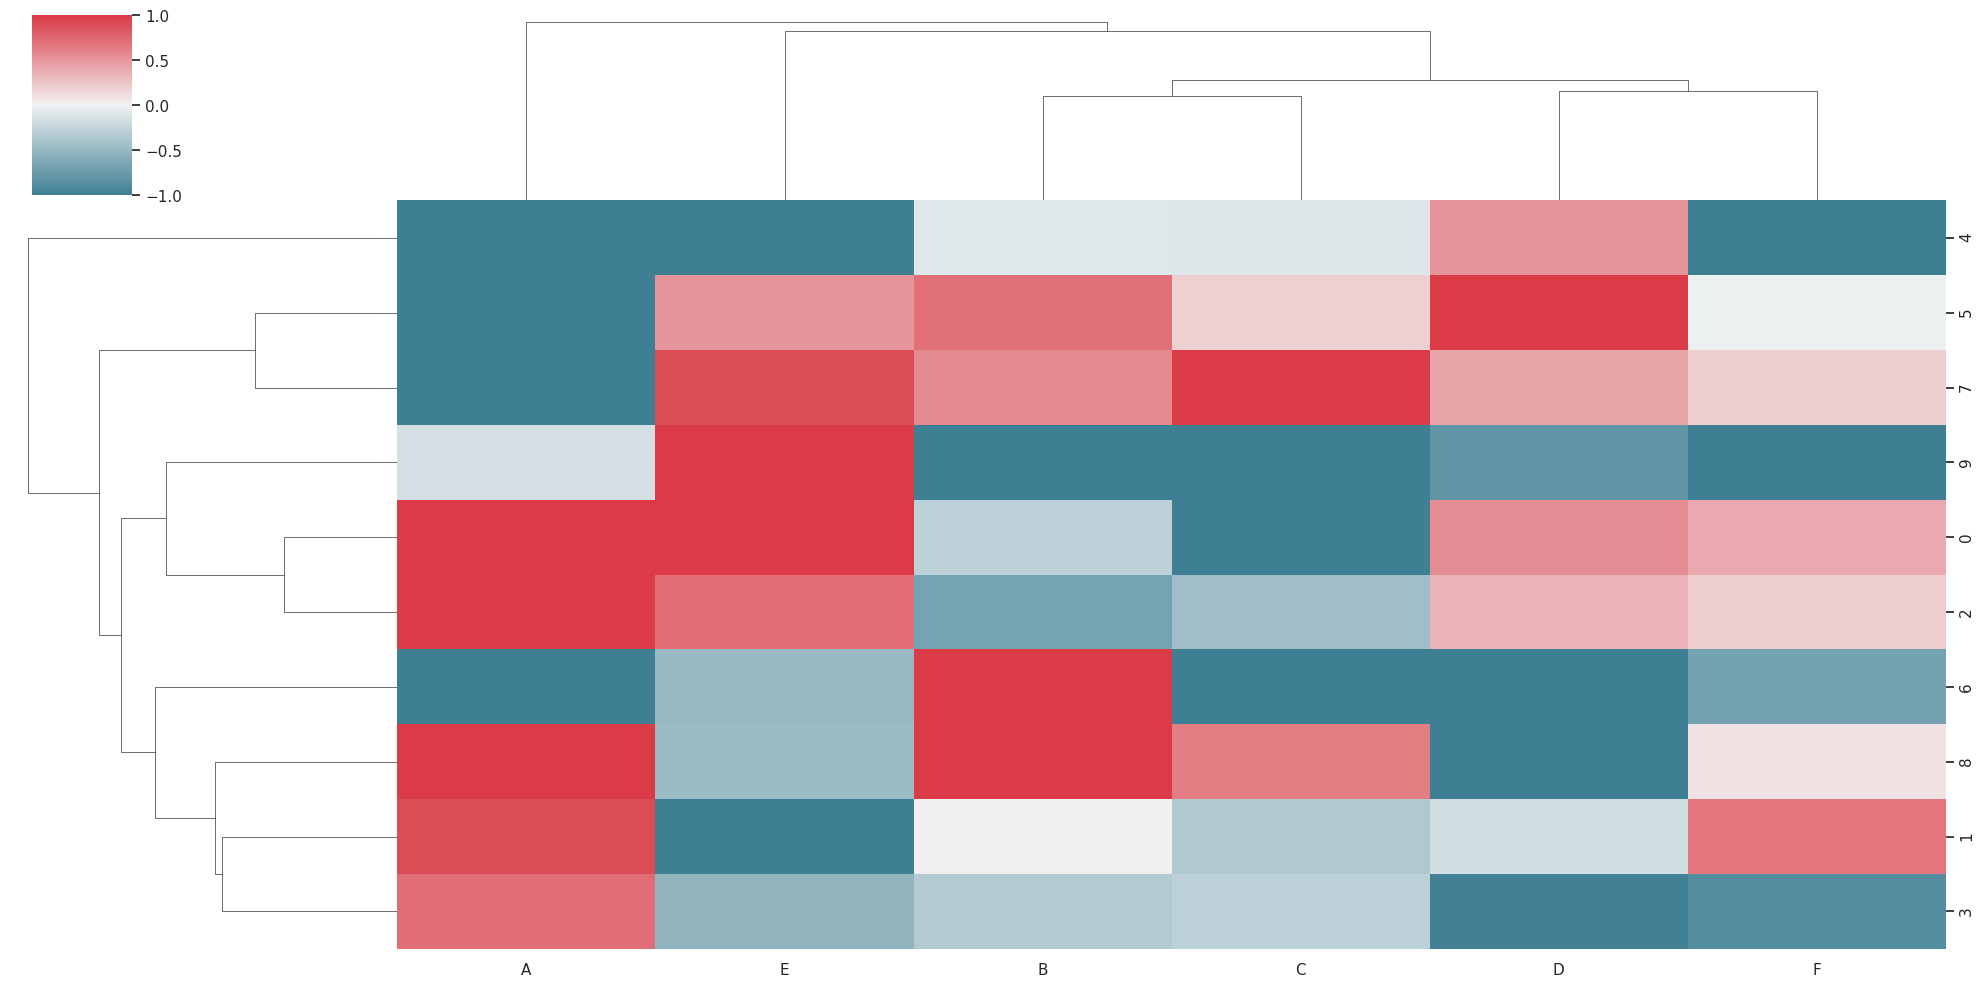

In [14]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [15]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.614GB vms=3.094GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.617GB vms=3.096GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


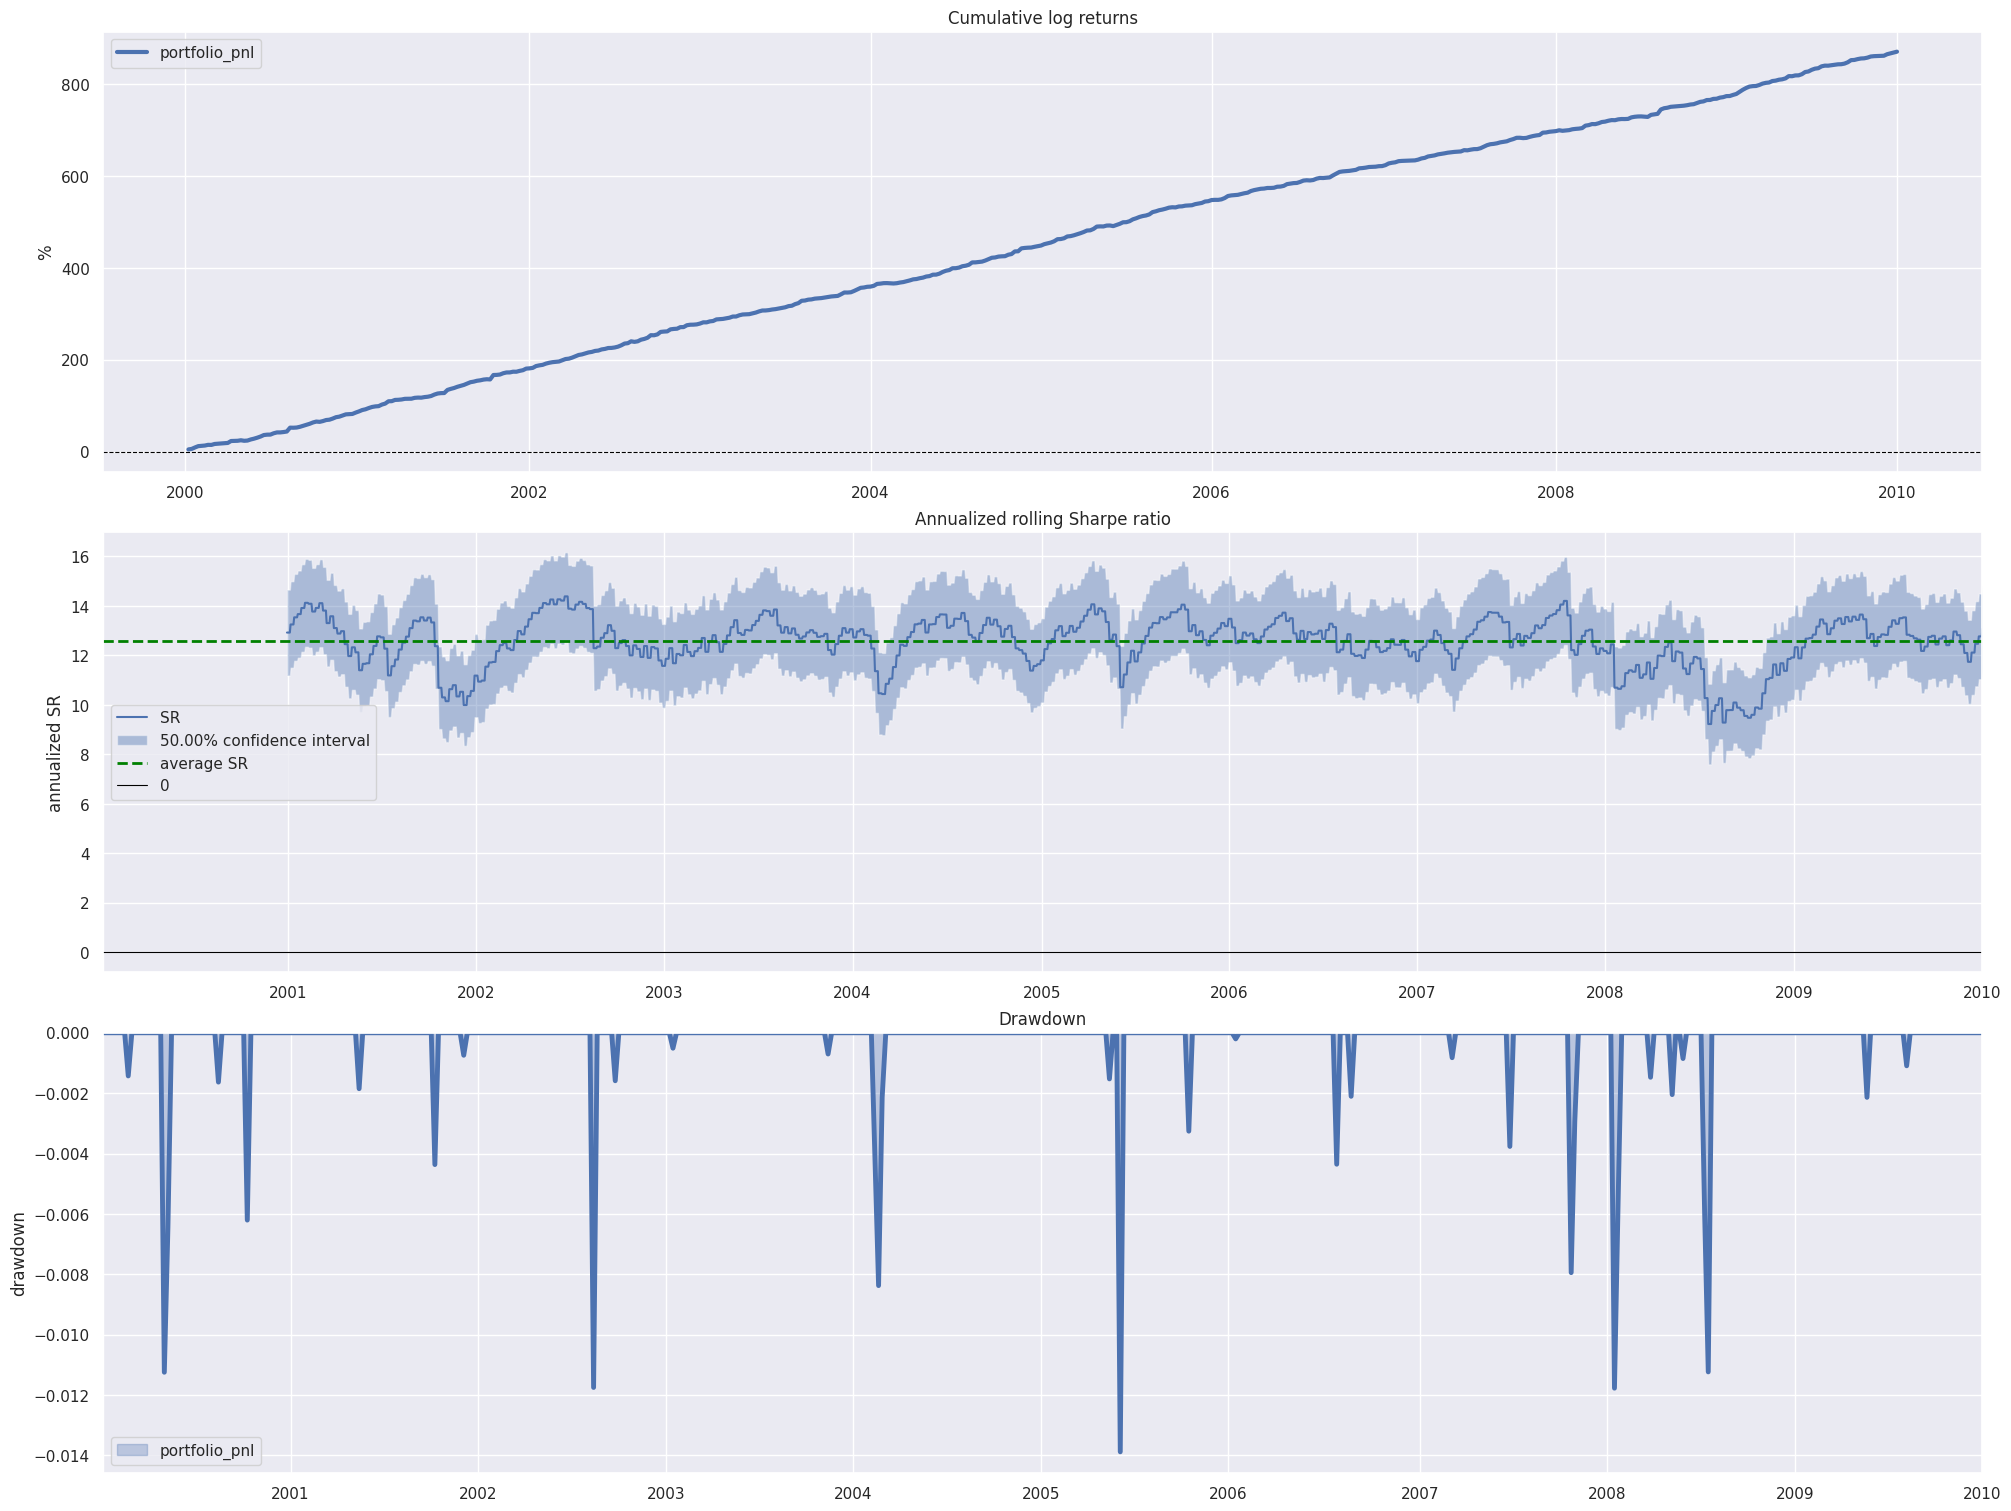

In [16]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [17]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


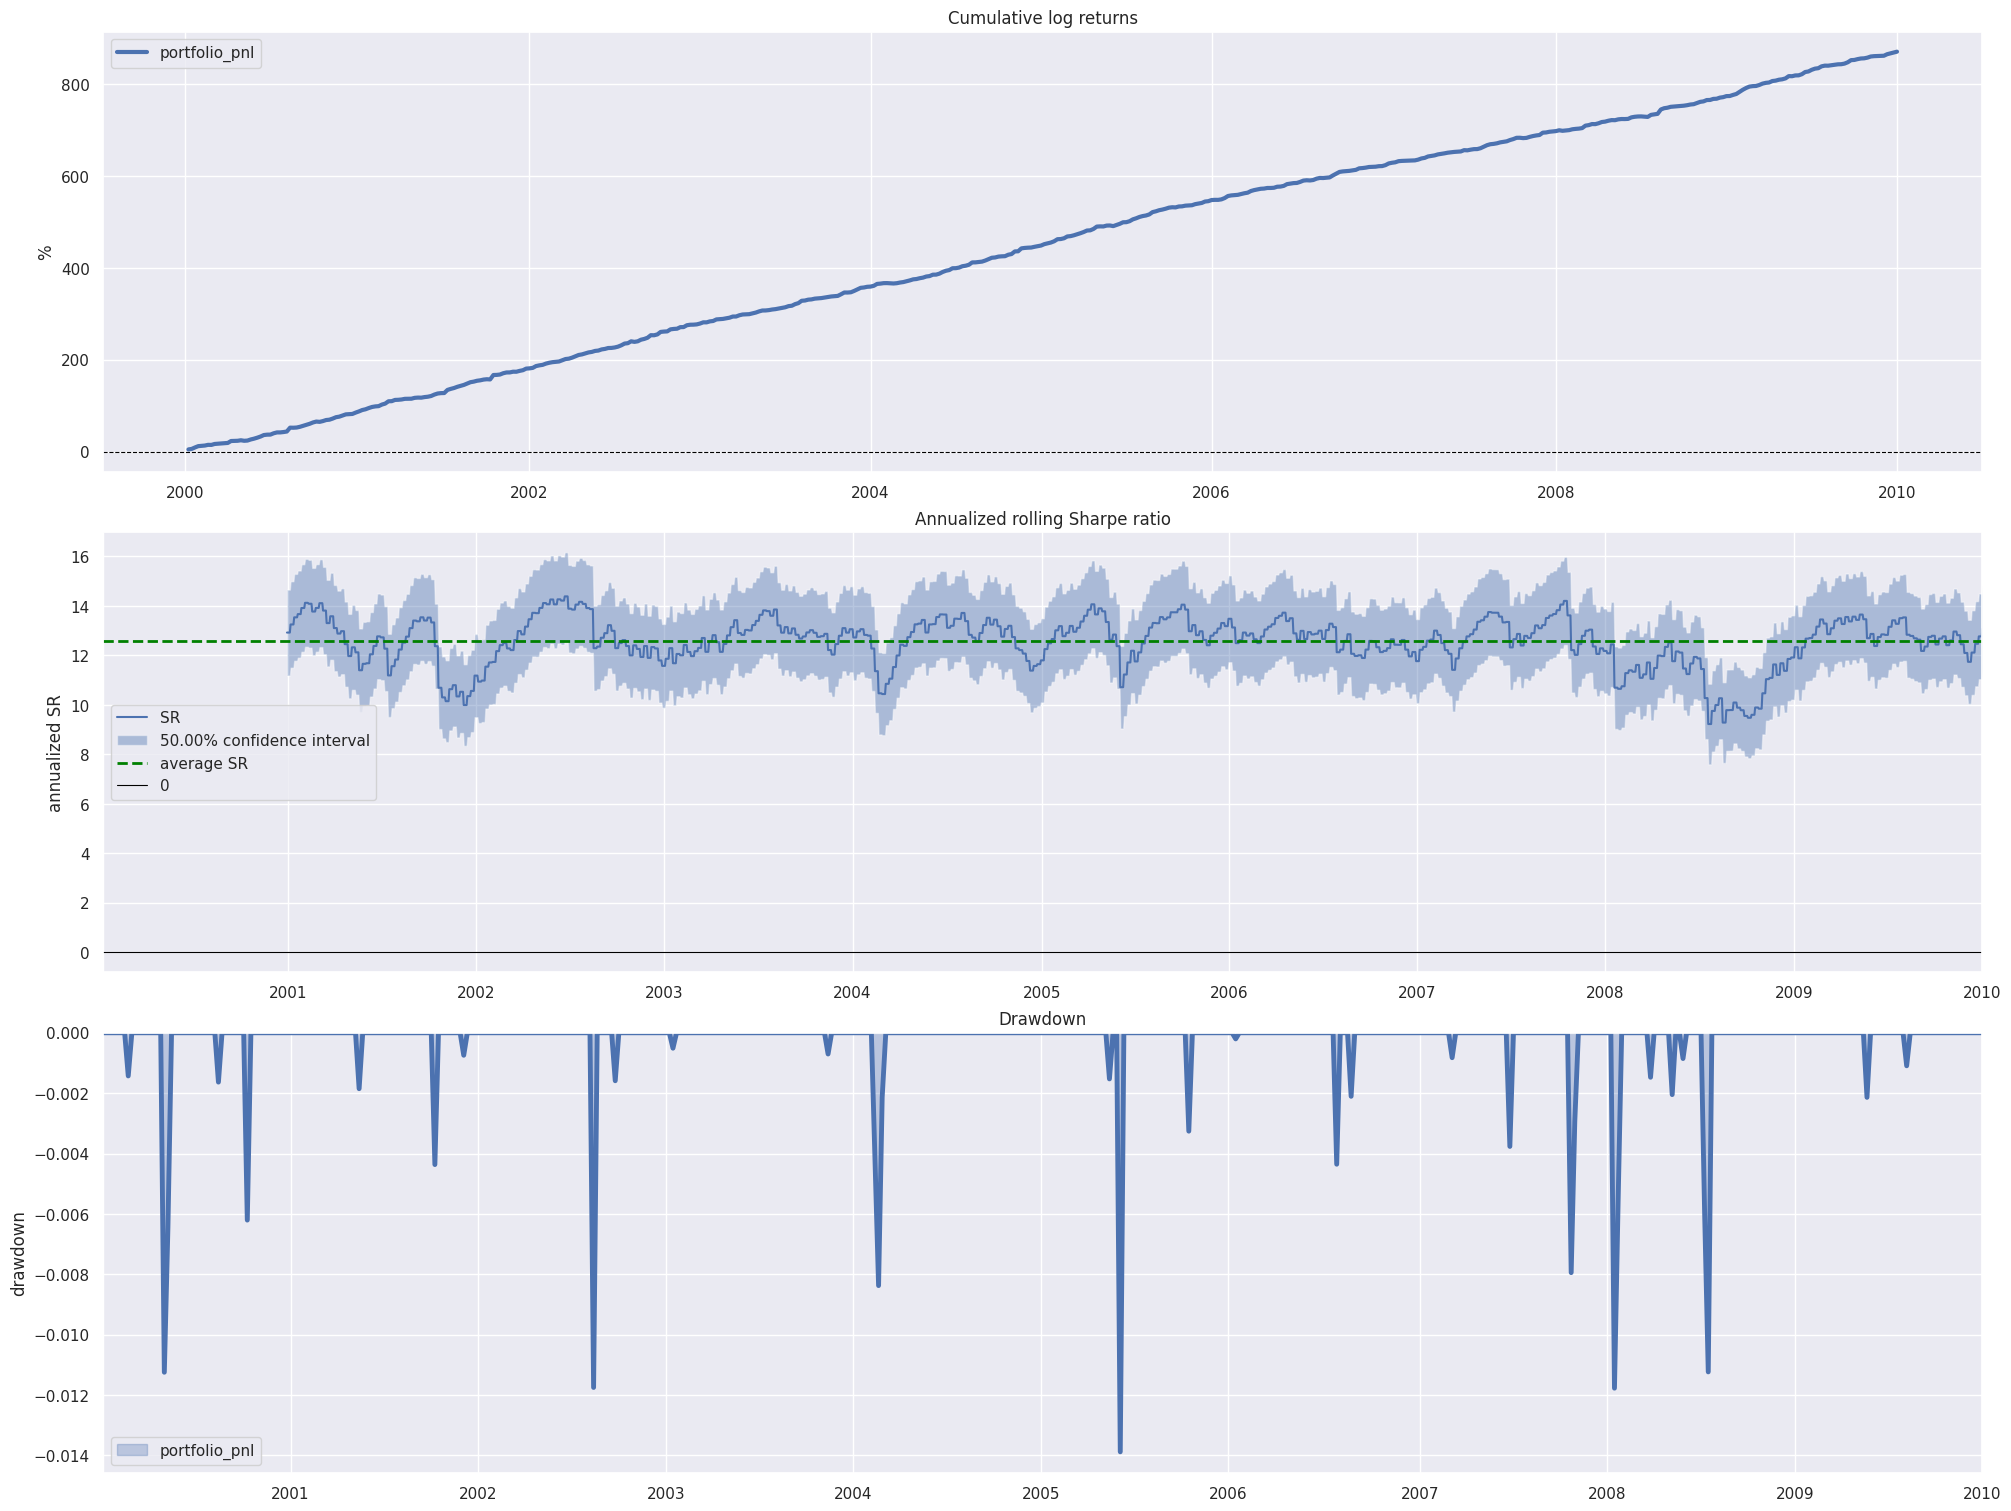

In [18]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

In [19]:
test_df = cptetepl.Test_plots.get_plot_effective_correlation_rank1()

[3.302733878630604, 2.9627142409859952, 2.173608256487338]

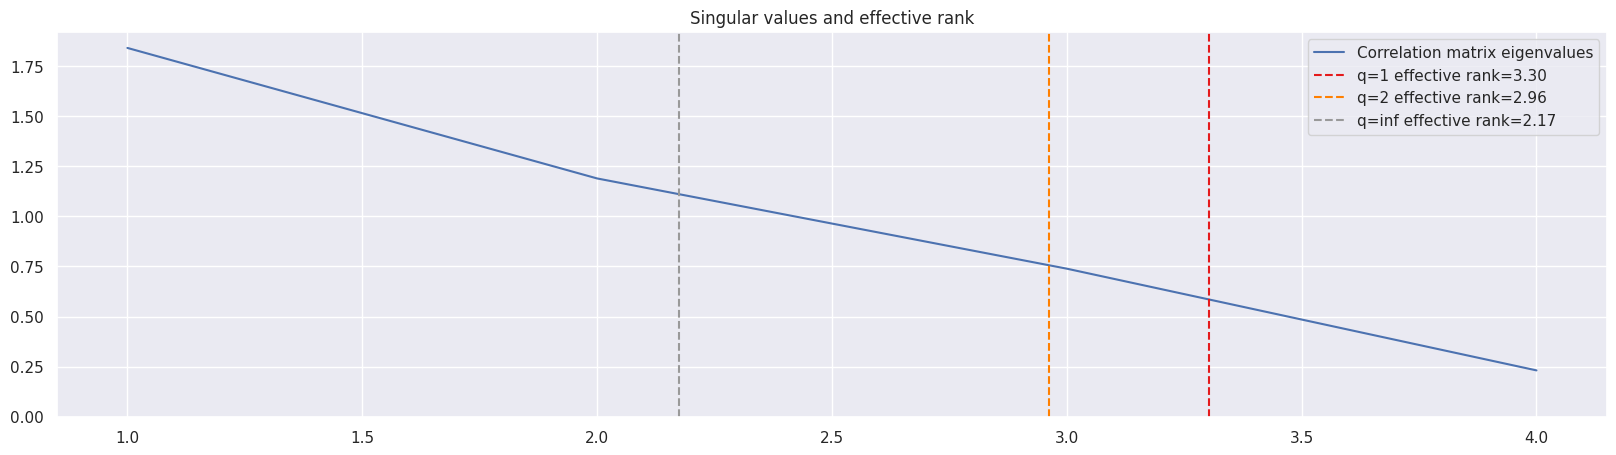

In [20]:
cplocorr.plot_effective_correlation_rank(test_df)

[2.428244488466705,
 2.7051679170113525,
 2.726857130577548,
 2.660661507946788,
 2.39193275638912]

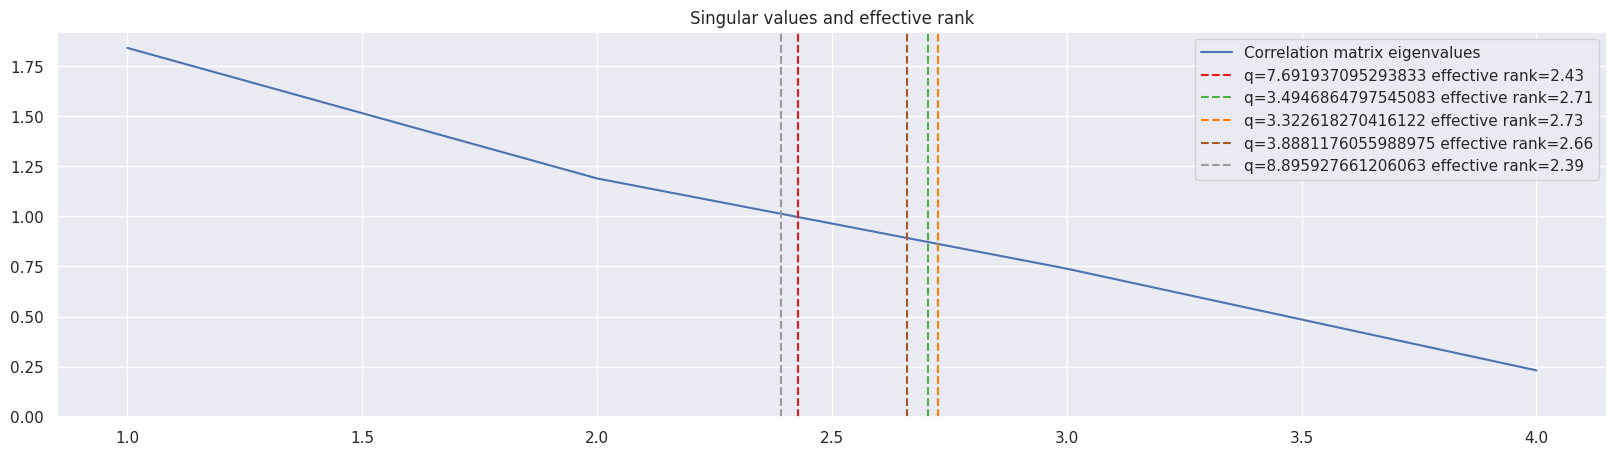

In [21]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [22]:
test_df = cptetepl.Test_plots.get_plot_spectrum1()

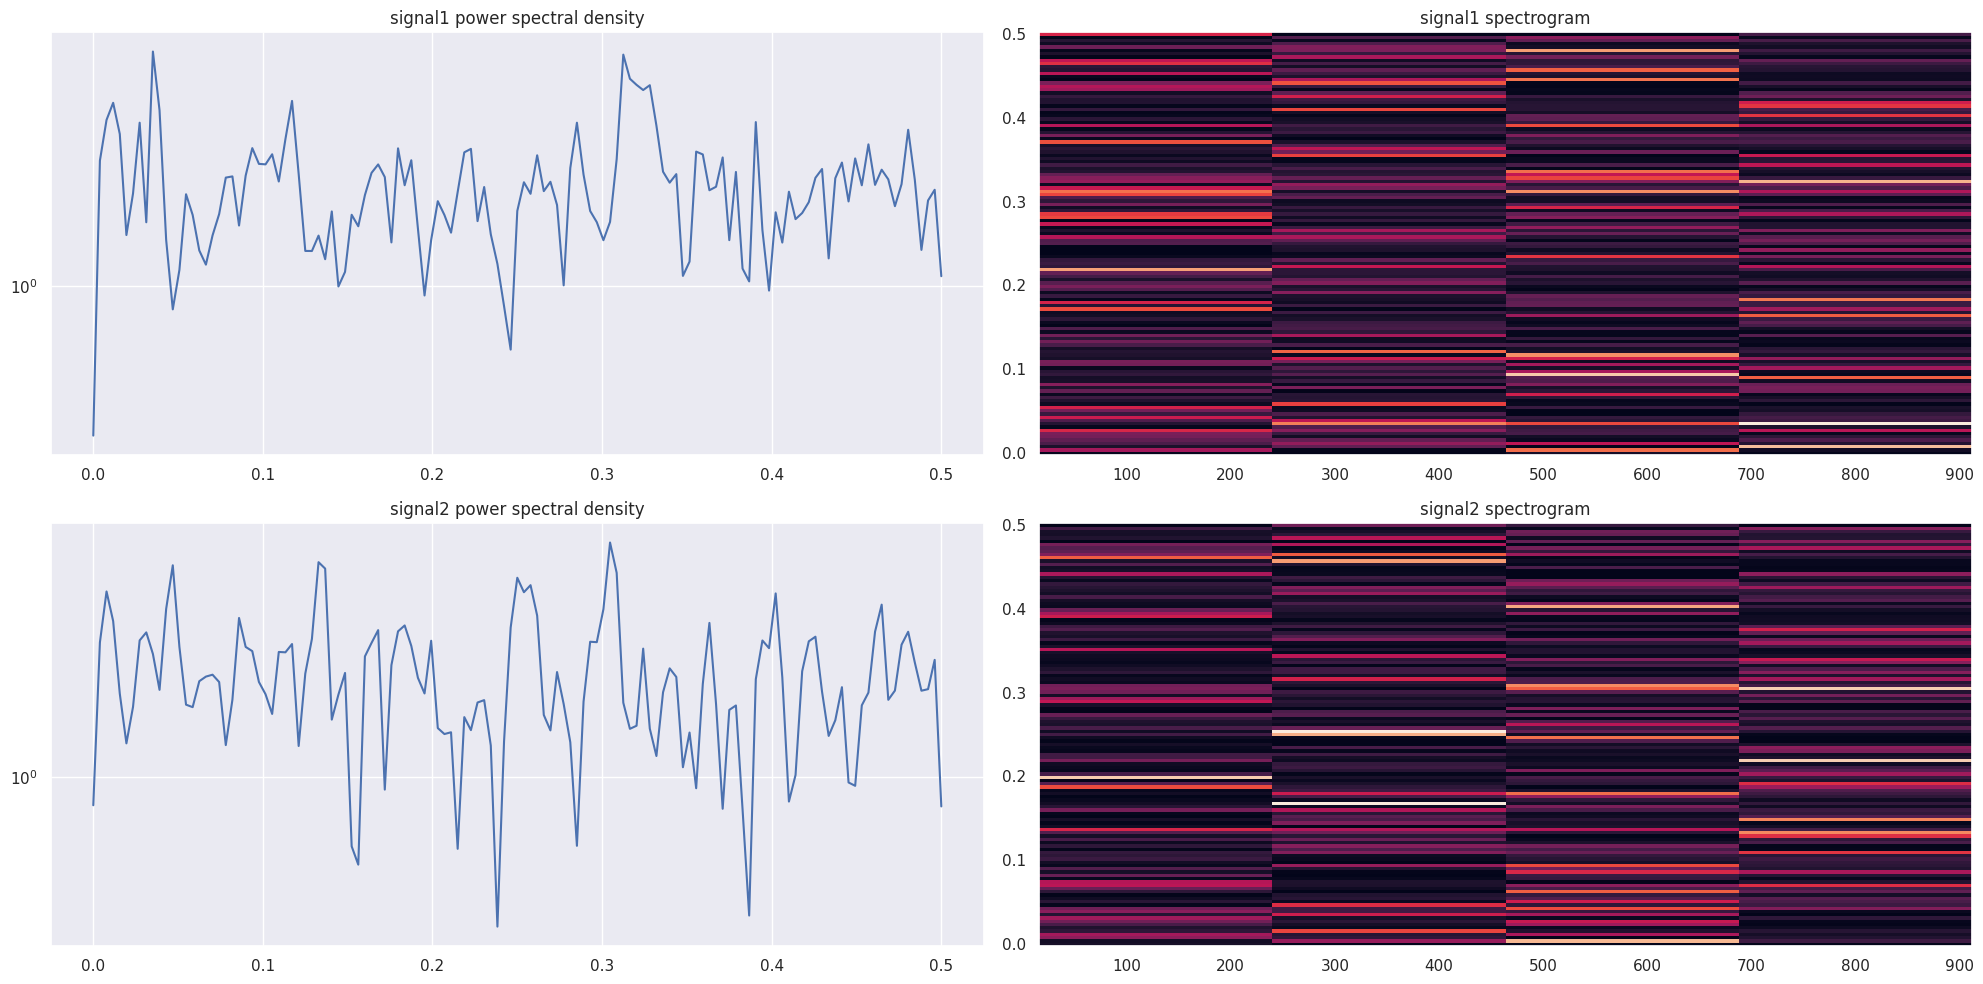

In [23]:
cplmiplo.plot_spectrum(test_df)

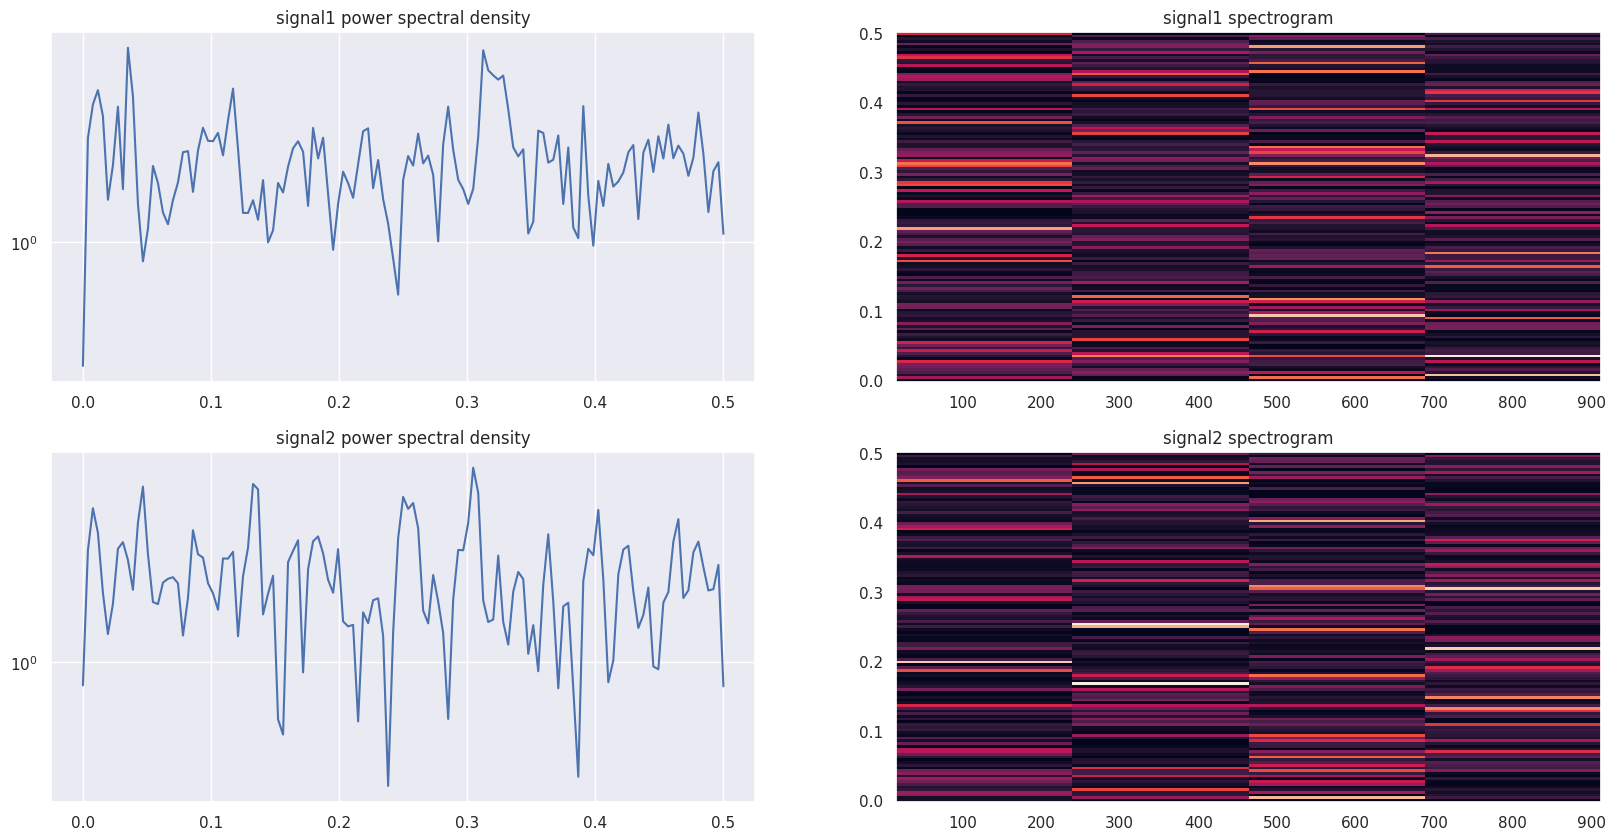

In [24]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## `plot_projection()`

In [6]:
df = cptetepl.Test_plots.get_plot_projection1()

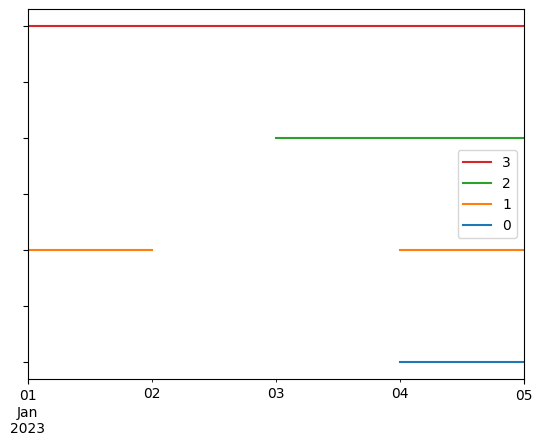

In [7]:
special_values = [0]
cplmiplo.plot_projection(df, special_values=special_values)

/app/core/plotting/misc_plotting.py:202: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  range_df.iloc[:, i] = i


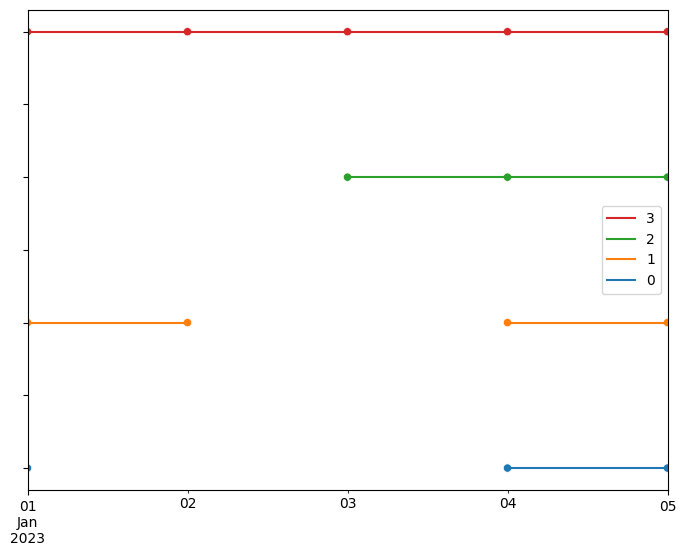

In [8]:
df = df.replace({0: None})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
mode = "scatter"
cplmiplo.plot_projection(df, mode=mode, ax=ax)